# CIFAR10 (Canadian Institute For Advanced Research 10)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.datasets import cifar10
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, ReLU, Softmax
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import plot_model

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

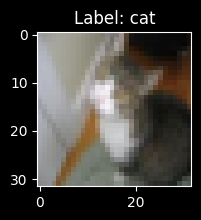

In [8]:
def plot_sample(index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.title("Label: {}".format(class_names[y_train[index][0]]))


plot_sample(101)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## CNN


In [10]:
cnn = Sequential(
    layers=[
        Input(shape=(32, 32, 3)),
        Conv2D(filters=32, kernel_size=3, padding="same", strides=1),
        ReLU(),
        MaxPooling2D(pool_size=2, strides=2),
        Conv2D(filters=64, kernel_size=3, padding="same", strides=1),
        ReLU(),
        MaxPooling2D(pool_size=2, strides=2),
        Flatten(),
        Dense(128),
        ReLU(),
        Dense(10),
        Softmax(),
    ],
    name="cnn",
)

In [11]:
cnn.layers

[<Conv2D name=conv2d, built=True>,
 <ReLU name=re_lu, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <ReLU name=re_lu_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <ReLU name=re_lu_2, built=True>,
 <Dense name=dense_1, built=True>,
 <Softmax name=softmax, built=True>]

In [12]:
cnn.summary()

Model: "cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
cnn.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)

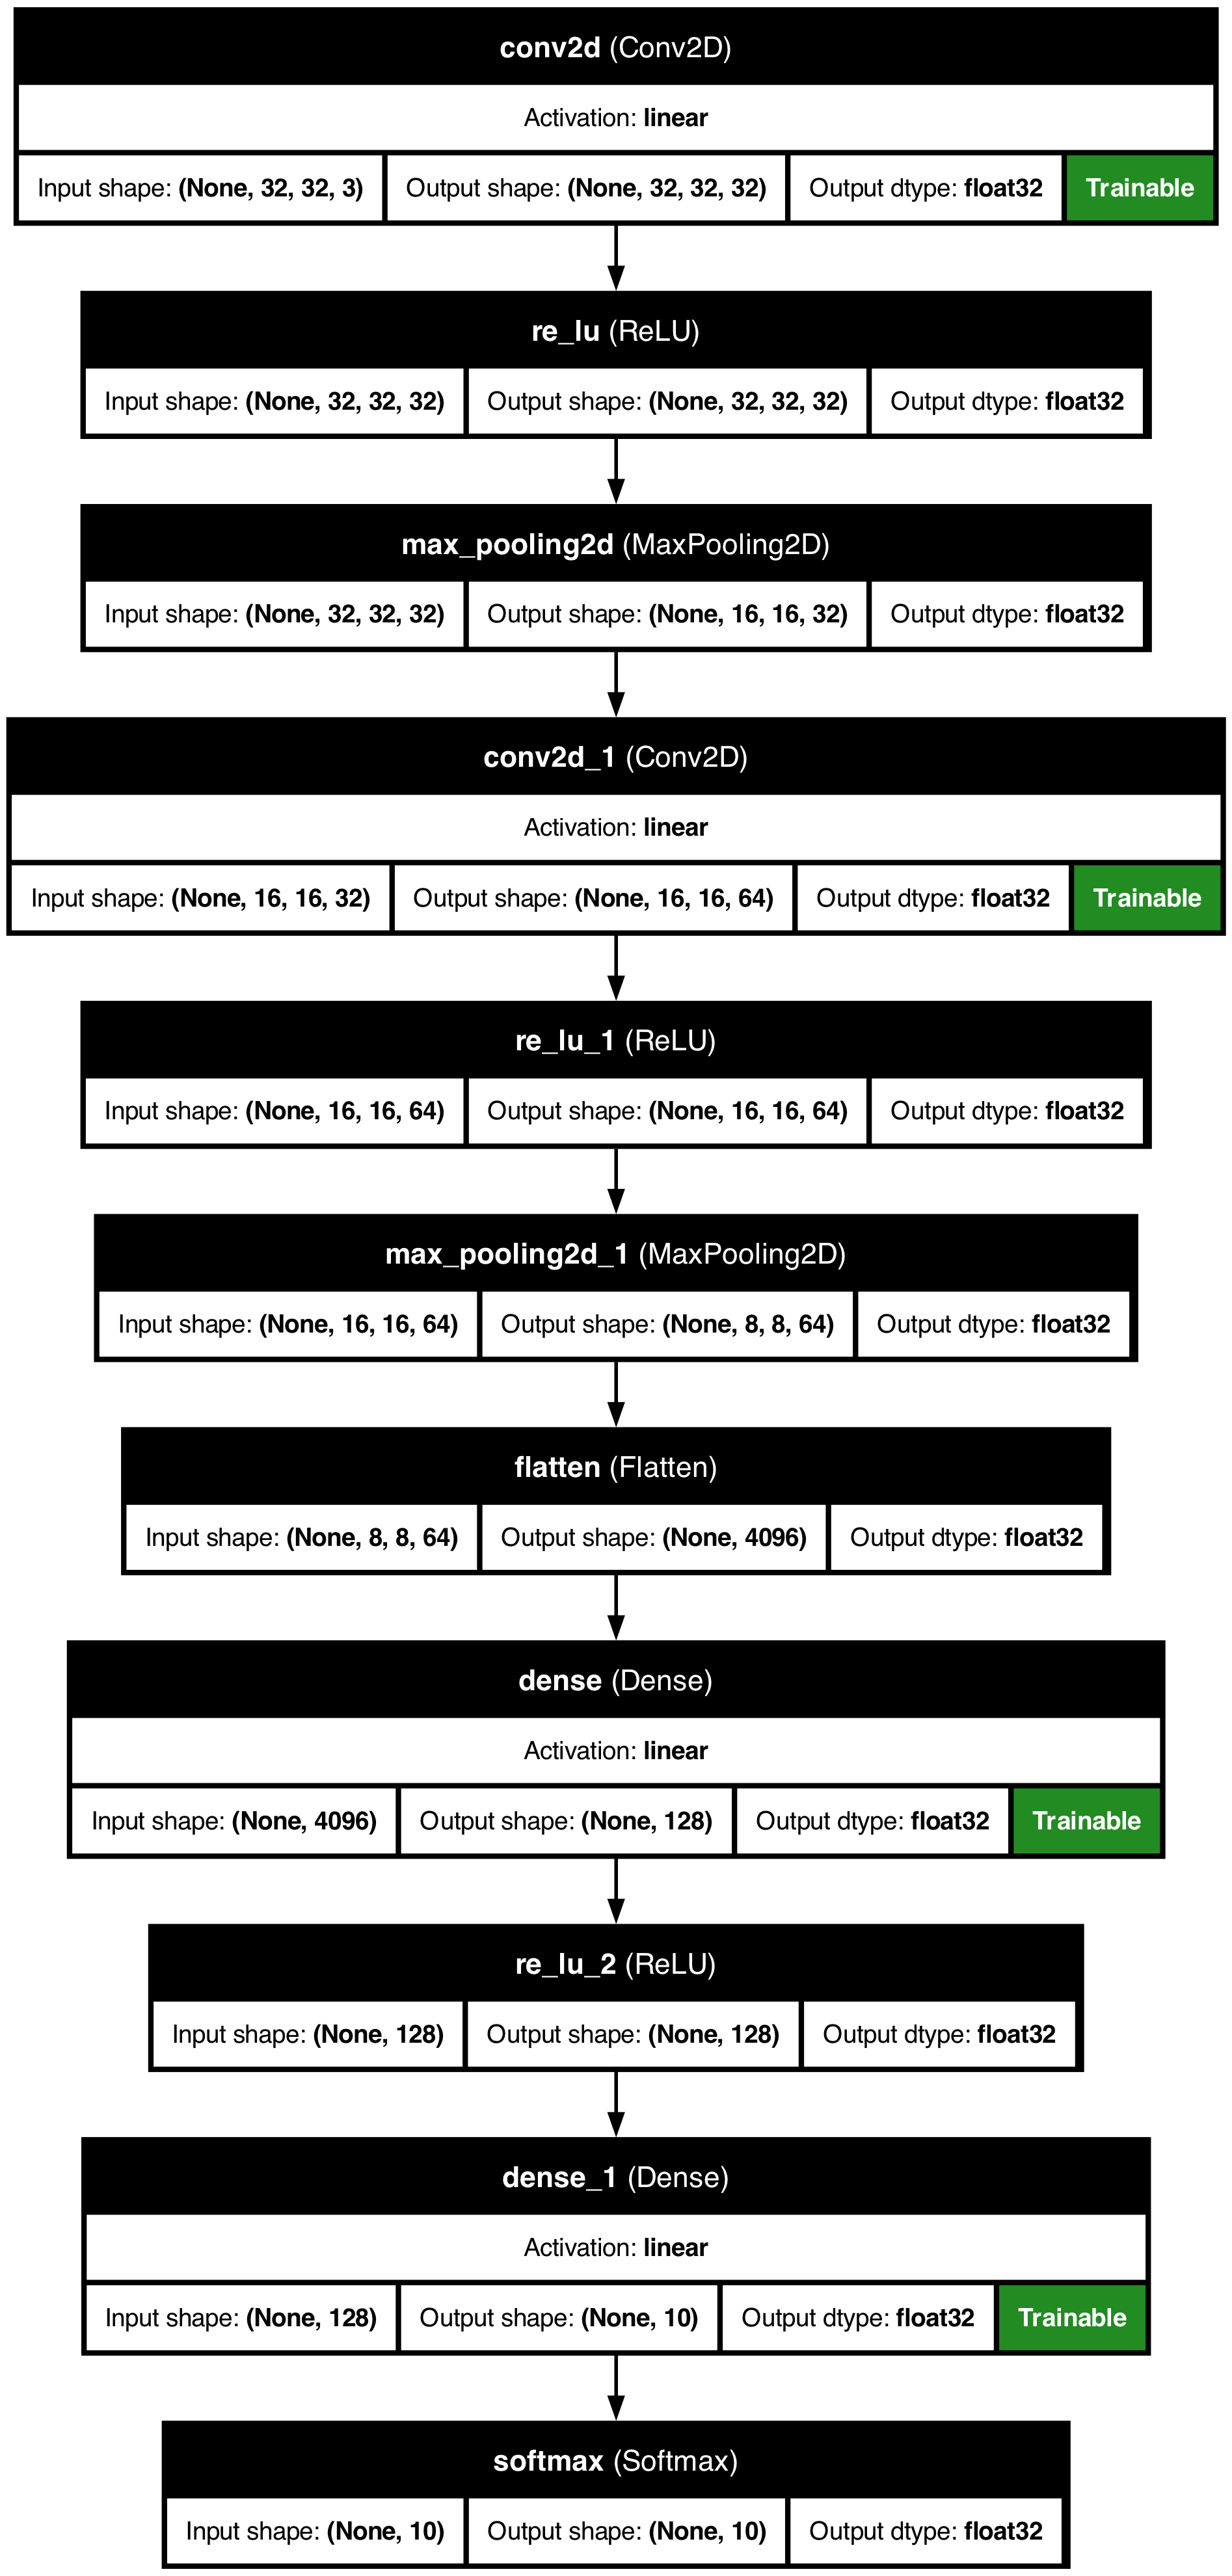

In [14]:
plot_model(
    cnn,
    to_file="Images/cifar10_cnn.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True,
    show_trainable=True,
)

In [15]:
cnn_checkpoint_callback = ModelCheckpoint(
    filepath="../../../Models/cifar10_cnn.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
cnn_tensorboard_callback = TensorBoard(
    log_dir="../../../Logs/cifar10_cnn_logs",
    histogram_freq=1,
    write_images=True,
    write_steps_per_second=True,
)
# tensorboard --logdir="Logs/cifar10_cnn_logs"

cnn_csvlogger_callback = CSVLogger(
    "../../../Logs/cifar10_cnn_logs/cifar10_cnn_logs.csv"
)

cnn_history = cnn.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.2,
    callbacks=[
        cnn_checkpoint_callback,
        cnn_tensorboard_callback,
        cnn_csvlogger_callback,
    ],
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - loss: 1.7329 - sparse_categorical_accuracy: 0.3743 - val_loss: 1.2302 - val_sparse_categorical_accuracy: 0.5725
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - loss: 1.1254 - sparse_categorical_accuracy: 0.6022 - val_loss: 1.0481 - val_sparse_categorical_accuracy: 0.6369
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - loss: 0.9504 - sparse_categorical_accuracy: 0.6673 - val_loss: 0.9734 - val_sparse_categorical_accuracy: 0.6626
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - loss: 0.8546 - sparse_categorical_accuracy: 0.7010 - val_loss: 0.9185 - val_sparse_categorical_accuracy: 0.6846
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - loss: 0.7679 - sparse_categorical_accuracy: 0.7321 - val_loss: 0.9279 - val_sparse_categorical_accuracy: 0.6845
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 55ms/step - loss: 0.7013 - sparse_categorical_accuracy: 0.7563 - val_loss: 0.9233 - val_sparse_categorical_accuracy:

In [16]:
cnn_train_loss = cnn_history.history["loss"]
cnn_train_acc = cnn_history.history["sparse_categorical_accuracy"]
cnn_val_loss = cnn_history.history["val_loss"]
cnn_val_acc = cnn_history.history["val_sparse_categorical_accuracy"]


print("Training loss:", np.mean(cnn_train_loss))
print("Validation loss:", np.mean(cnn_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(cnn_train_acc), np.std(cnn_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(cnn_val_acc), np.std(cnn_val_acc))
)

Training loss: 0.8046958476305008
Validation loss: 0.9651247262954712
0.716765 Training accuracy with a standard deviation of 0.105364
0.677360 Validation accuracy with a standard deviation of 0.041790


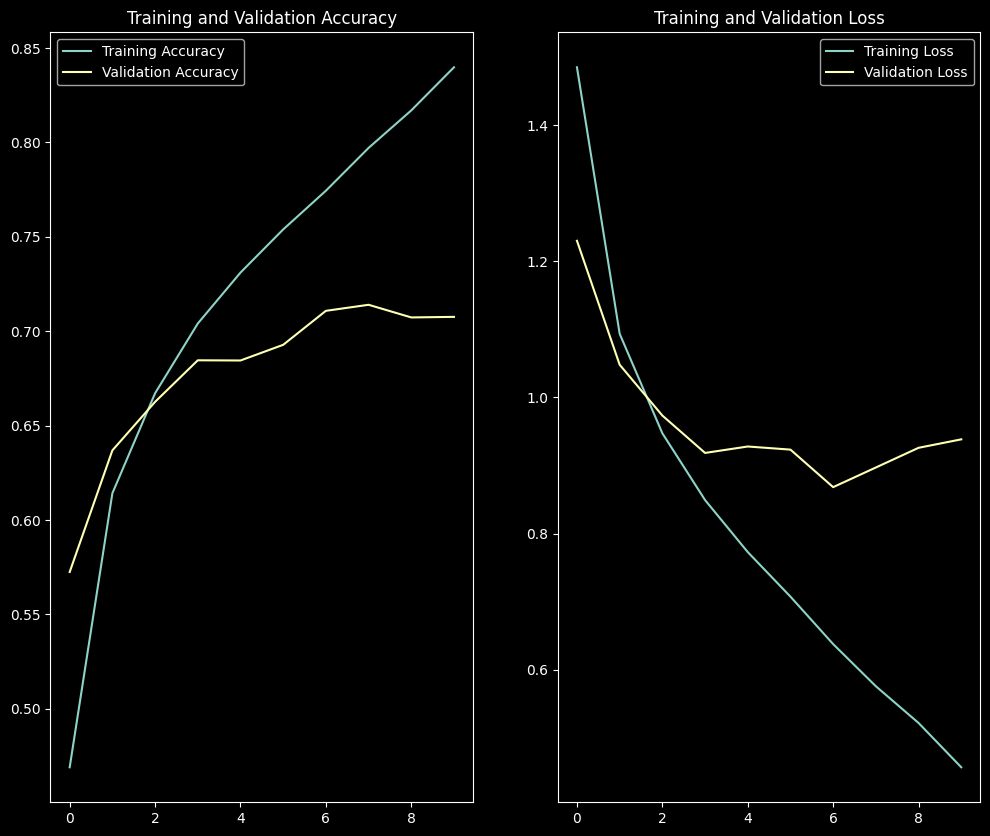

In [17]:
epochs_range = range(10)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cnn_train_acc, label="Training Accuracy")
plt.plot(epochs_range, cnn_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, cnn_train_loss, label="Training Loss")
plt.plot(epochs_range, cnn_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("Images/cifar10_cnn_acc_loss.png", bbox_inches="tight")

In [18]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", cnn_test_loss)
print("Test accuracy:", cnn_test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.9320 - sparse_categorical_accuracy: 0.7152
Test loss: 0.942322850227356
Test accuracy: 0.7124999761581421


In [19]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
